In [6]:
# to be removed from public example
import sys
sys.path.append('/Users/lucasmueller/Repositories/DeepSMLM')

# DECODE - General Introduction
If you plan to install and use DECODE locally we recommend going through this notebook to get familiar with the framework.

We make highly use of the CUDA accelerated library PyTorch which is used internally almost everywhere.

In [7]:
import decode
import decode.utils  # interfaces to outside world which are not loaded by default
import torch

## EmitterSet

At the core of DECODE is the EmitterSet. It has a lot of important functionalities which one should know about. In an interactive Python session (such as this notebook or in the console) you can get more information of all implementations by `help([...])`, e.g.
> `help(decode.EmitterSet)`


In [8]:
# construct an EmitterSet
em = decode.EmitterSet(
    xyz=torch.tensor([[15., 15., 0.], [30., 10., 500.]]),
    phot=torch.tensor([1000, 500.]),
    frame_ix=torch.tensor([0, 100]),
    xy_unit='px', # z is always in nm
    px_size=(100., 100.))  # not strictly needed but recommended in order to access xyz in both 

print(em)  # get some info on the set of emitters

EmitterSet
::num emitters: 2
::xy unit: px
::px size: tensor([100., 100.])
::frame range: 0 - 100
::spanned volume: [15. 10.  0.] - [ 30.  15. 500.]


The coordinates can (and should) explicitly accessed with a unit as em.xyz_px or em.xyz_nm

In [9]:
em.xyz_nm

tensor([[1500., 1500.,    0.],
        [3000., 1000.,  500.]])

In [10]:
# you can also set coordinates in a new unit which will lead to automatic conversion
em.xyz_nm = torch.rand(2, 3)

print(em)  # you see now that the internal storage has changed from px units to nm

EmitterSet
::num emitters: 2
::xy unit: nm
::px size: tensor([100., 100.])
::frame range: 0 - 100
::spanned volume: [0.16896987 0.07136184 0.2007041 ] - [0.78350997 0.7713888  0.85042506]


### Export, Save and Load Emitters
We feature several methods to export, save, load emitters. 
1. To interact with another software the most simple format is exporting as a csv file, however this is not recommended for long term use. If you need assistance with the design of an interface to your software, please write us.

2. For fast read/write and smaller files we recommend using the `.save()` method which saves the emitterset as a dictionary of PyTorch tensors and some meta data. Note that this does not have long term 

> CSV Export and Import

In [11]:
# csv export and import
# write to a csv file
decode.utils.emitter_io.save_csv('dummy.csv', em.to_dict())  # convert emitter to dictionary

# have a look at the csv
import pandas as pd

pd.read_csv('dummy.csv')

,x,y,z,phot,frame_ix,id,prob,bg,phot_cr,bg_cr,phot_sig,bg_sig,xy_unit,x_cr,y_cr,z_cr,x_sig,y_sig,z_sig
0,0.16897,0.071362,0.200704,1000.0,0,-1,1.0,NaN,NaN,NaN,NaN,NaN,nm,NaN,NaN,NaN,NaN,NaN,NaN
1,0.78351,0.771389,0.850425,500.0,100,-1,1.0,NaN,NaN,NaN,NaN,NaN,nm,NaN,NaN,NaN,NaN,NaN,NaN


Loading emitters from csv is also possible. You need to specify a mapping with keys at least: `x, y, z, phot, frame_ix`
>We provide some 'batteries included' mappings, e.g. for the superres fight club challenge format.

In [12]:
# this is the challenge mapping
decode.utils.emitter_io.challenge_mapping

{'x': 'xnano',
 'y': 'ynano',
 'z': 'znano',
 'frame_ix': 'frame',
 'phot': 'intensity ',
 'id': 'Ground-truth'}

In [ ]:
em_challenge = decode.utils.emitter_io.load_csv('path_to_challenge_activations.csv', 
                                                mapping=decode.utils.emitter_io.challenge_mapping)

> Save and Load via binary file

In [17]:
em.save('dummy.pt')  # we recommend file extension .pt but do not enforce this in any way

In [18]:
# load an EmitterSet from binary file by static method .load()
em_clone = decode.EmitterSet.load('dummy.pt')

### Operators and Helpers on EmitterSets
We implemented a couple of helpers for convenience

In [35]:
# we support boolean indexing of emitters
subset = em[[True, False]]

# e.g. get emitter on specific frame
em_sub = em[em.frame_ix == 0]

# e.g. emitters with certain photon count
em_bright = em[em.phot > 600.]

In [22]:
# check equality of two sets of emitters 
# warning: requires exact equality, i.e. even the order of coordinates must be the same
em == em_clone

True

In [24]:
# iterate over emitters in set
[print(e) for e in em]

EmitterSet
::num emitters: 1
::xy unit: nm
::px size: tensor([100., 100.])
::frame range: 0 - 0
::spanned volume: [0.16896987 0.07136184 0.2007041 ] - [0.16896987 0.07136184 0.2007041 ]
EmitterSet
::num emitters: 1
::xy unit: nm
::px size: tensor([100., 100.])
::frame range: 100 - 100
::spanned volume: [0.78350997 0.7713888  0.85042506] - [0.78350997 0.7713888  0.85042506]


[None, None]

In [29]:
# split emitterset in frames
em_split = em.split_in_frames(ix_low=0, ix_up=10)  # outputs lists of EmitterSets per frame

In [37]:
# concatenate multiple emittersets together
em_cat = decode.EmitterSet.cat(em_split)

### Sampling Emitters
We provide some conveniences to sample or construct emitters

In [50]:
em_random = decode.RandomEmitterSet(200)  # outputs 200 random emitters, see help(decode.RandomEmitterSet) for more information
print(em_random)

EmitterSet
::num emitters: 200
::xy unit: px
::px size: None
::frame range: 0 - 0
::spanned volume: [0.01889992 0.19894409 0.02507019] - [31.832289 31.989344 31.980846]


### Plotting Emitters in 2D and 3D

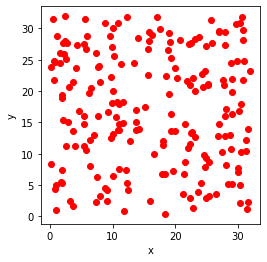

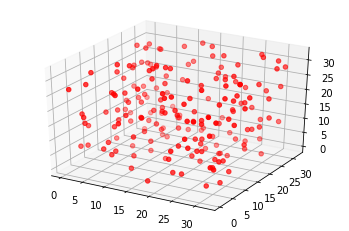

In [51]:
import matplotlib.pyplot as plt

em_fuzzy = decode.RandomEmitterSet(200)

decode.plot.PlotCoordinates(em_fuzzy.xyz_px).plot()
plt.show()

decode.plot.PlotCoordinates3D(em_fuzzy.xyz_px).plot()
plt.show()